In [5]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

def fetch_weather_data(latitude, longitude):
    # API URL de Open-Meteo
    url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&hourly=temperature_2m&timezone=auto"
    response = requests.get(url)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error al obtener los datos del clima: {response.status_code}")
        return None

def filter_weather_data(weather_data):
    # Obtener datos de temperatura y tiempo
    hourly_time = weather_data["hourly"]["time"]
    hourly_temp = weather_data["hourly"]["temperature_2m"]

    # Fecha de hoy y mañana
    today = datetime.now().date()
    tomorrow = today.replace(day=today.day + 1)

    # Filtrar temperaturas por fecha
    today_temps = []
    tomorrow_temps = []
    hours_today = []
    hours_tomorrow = []

    for time, temp in zip(hourly_time, hourly_temp):
        hour = datetime.fromisoformat(time)
        if hour.date() == today:
            today_temps.append(temp)
            hours_today.append(hour.strftime("%H:%M"))
        elif hour.date() == tomorrow:
            tomorrow_temps.append(temp)
            hours_tomorrow.append(hour.strftime("%H:%M"))

    return hours_today, today_temps, hours_tomorrow, tomorrow_temps

def plot_weather(hours_today, today_temps, hours_tomorrow, tomorrow_temps):
    plt.figure(figsize=(10, 6))
    
    # Graficar las temperaturas de hoy
    plt.plot(hours_today, today_temps, label="Hoy", marker="o", color="blue")
    
    # Graficar las temperaturas de mañana
    plt.plot(hours_tomorrow, tomorrow_temps, label="Mañana", marker="o", color="red")
    
    # Configuración del gráfico
    plt.title("Pronóstico de Temperatura: Hoy y Mañana")
    plt.xlabel("Hora")
    plt.ylabel("Temperatura (°C)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    
    # Guardar el gráfico como imagen
    plt.tight_layout()
    plt.savefig("forecast.png")
    print("Gráfico generado: forecast.png")
    plt.show()

def main():
    # Coordenadas de la ubicación
    latitude = -33.215544441886905  # Latitud
    longitude = -70.66355361024546  # Longitud

    # Obtener datos del clima
    weather_data = fetch_weather_data(latitude, longitude)
    if weather_data is None:
        return

    # Filtrar los datos por hoy y mañana
    hours_today, today_temps, hours_tomorrow, tomorrow_temps = filter_weather_data(weather_data)

    # Graficar los datos
    plot_weather(hours_today, today_temps, hours_tomorrow, tomorrow_temps)


In [2]:
pip install requests

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2024.12.14-py3-none-any.whl.metadata (2.3 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.12.14-py3-none-any.whl (164 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

  Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 39.9 MB/s eta 0:00:00
Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl (249 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 21.2 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl (64 kB)
Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Gráfico generado: forecast.png


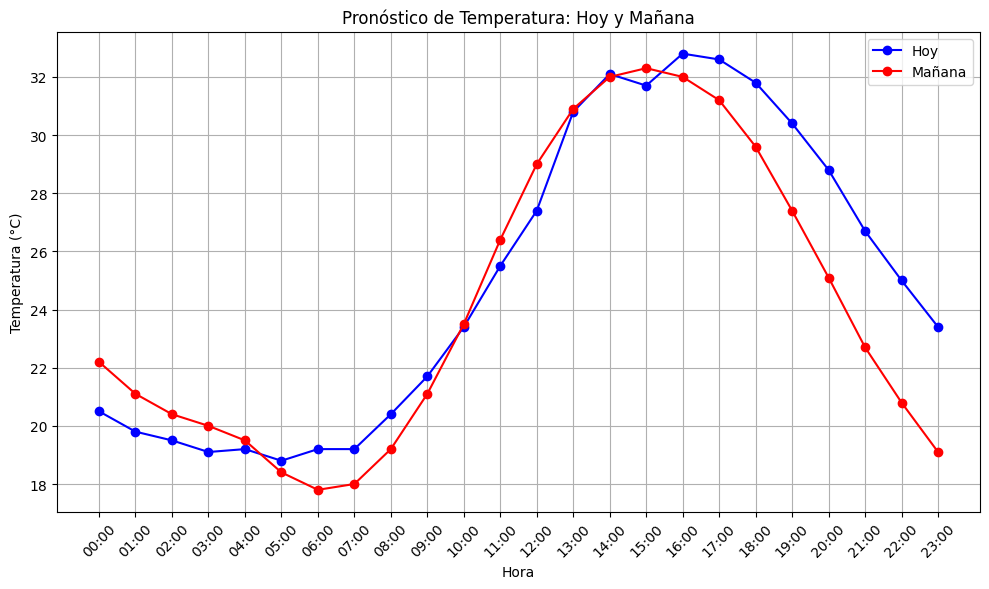

In [6]:
main()